# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

## Respuesta
Creo que el primer paso es investigar sobre la temática. En ese sentido, observo que la valuación por excelencia , se realiza con la "Metodología de Precios Hedónicos" (MPH), por la cual "...si un bien está en realidad constituido por un conjunto de atributos, entonces su precio de mercado deberá ser un agregado de los precios individuales de todos ellos" (Núñez, Ceular, Millán, 2007). Este modelo recoge los atributos que, mediante un modelo de regresión, nos ayudan a predecir el valor de venta. Desde luego, hay diversos trabajos sobre la temática. En general, todos apuntan a la determinación del precio en función de variables físicas y de localización (Leon, 2016). Por ejemplo:  

**1. Físicas (atributos de la vivienda):**
* número de ambientes, de baños, de metros cuadrados cubiertos y totales, etc.  
* garage, patio, agua corriente, cloacas, gas. Casa o edificio. Si esta en edificio, si la vivienda da a la calle, o es contrafrente, etc.  
  
**2. Localización (aplicable a toda propiedad emplazada en mismo lugar):**    
  
* distancia (negativa) a transporte público, hospitales, colegios, centros de esparcimiento y de compras, etc. También miraría densidad de todo lo anterior, el barrio, etc.  
* distancia (positiva) a aeropuerto y/u otros factores de contaminación sonora/ambiental.  
* Buscaría el número y tipo de delitos en la zona (esto no lo encontré en los modelos vistos).  
        
El modelo de Núñez, Ceular & MG Millán (op.cit, 2007), asimismo, menciona otros factores a tener en cuenta, como la tasa de interés, el nivel de ingreso, y la escasez de suelo libre, entre otras. 
        
Por último, de entre aquellos factores que podrian afectar tasación, creo que debería verse la forma de conocer probabilidad de ocurrecia de eventos con externalidades económicas, como realización de obras de ingeniería civil, inicio o cierre de emprendimientos comerciales, o de cualquier bien o servicio público.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm


Bad key "text.kerning_factor" on line 4 in
C:\Users\BagattinMarciano\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12, ha = 'center', xycoords = 'data') 
    

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha ='center' , xycoords = 'data')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [4]:
df = pd.read_csv ('DS_Proyecto_01_Datos_Properati.csv')

Veamos filas, columnas, y shape

In [5]:
df.index

RangeIndex(start=0, stop=146660, step=1)

In [6]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [7]:
df.shape

(146660, 19)

In [8]:
# Realizo un describe, para categóricas y numéricas. Primera radiografía del dataset.
df.describe(include='all') 

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
count,146660,146660,146660,136735.000000,136701.000000,146660,146660,146660,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05,146660,146660,146660,146660,146660
unique,366,412,366,NaN,NaN,1,4,89,NaN,NaN,NaN,NaN,NaN,NaN,1,77733,106668,10,1
top,2019-07-31,9999-12-31,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,NaN,NaN,NaN,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,11022,25101,11022,NaN,NaN,146660,92539,13073,NaN,NaN,NaN,NaN,NaN,NaN,146660,5064,235,107326,146660
mean,NaN,NaN,NaN,-34.604896,-58.465304,NaN,NaN,NaN,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.468428,0.486190,NaN,NaN,NaN,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-35.318457,-180.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,-34.627667,-58.504012,NaN,NaN,NaN,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,-34.600943,-58.443262,NaN,NaN,NaN,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,-34.574600,-58.407586,NaN,NaN,NaN,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05,NaN,NaN,NaN,NaN,NaN


LO SOBRESALIENTE:
de entre las variables categóricas: 1 país, 4 regiones, y 89 barrios diferentes. Operaciones en un solo típo de divisa (dólar), y 10 tipos diferentes de propiedades.
Prefiero no detenerme en los detalles de las numéricas hasta tanto depure el dataframe.

In [9]:
#Quiero ver que las variables numéricas y categoricas estén como tales
df.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [10]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Analizamos instancias por tipo de propiedad, mediante tabla y gráficamente. Ambas formas nos dejan ver la cantidad de tipos !=, y su frecuencia.

In [11]:
df['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

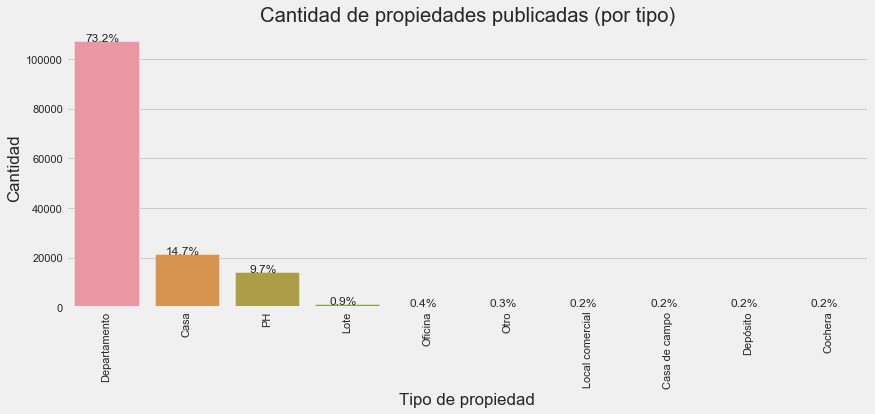

In [12]:
plt.figure(figsize = (6.4*2, 4.8)); ax = sns.countplot (data = df, x = 'property_type', order = df['property_type'].value_counts().index)
plt.title('Cantidad de propiedades publicadas (por tipo)', )
plt.xticks(rotation = 90)
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad")

without_hue(ax,df.property_type)
plt.show()
#plt.savefig('Cantidad de propiedades (por tipo).png', dpi = 400)

La sumatoria de Departamento, PH y Casa es practicamente equivalente al total de propiedades publicadas, alcanzando el 97,6%. 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [13]:
df['l2'].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [14]:
df['l3'].value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

In [15]:
#Vamos a mirar 'l3' más detenidamente. Observo que hay 89 etiquetas
df['l3'].unique()

array(['San Cristobal', 'Boedo', 'Palermo', 'La Plata', 'Villa Crespo',
       'Parque Patricios', 'Villa Pueyrredón', 'Pilar', 'Tigre', 'Abasto',
       'Flores', 'Morón', 'Nuñez', 'Almagro', 'Belgrano', 'Floresta',
       'Recoleta', 'Balvanera', 'Caballito', 'Chacarita', 'San Telmo',
       'Colegiales', 'La Matanza', 'San Isidro', 'San Miguel',
       'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás',
       'Villa Urquiza', 'Vicente López', 'Parque Centenario',
       'General San Martín', 'Villa General Mitre', 'Lanús', 'Ituzaingó',
       'Boca', 'Once', 'Retiro', 'Monserrat', 'Avellaneda',
       'San Fernando', 'Puerto Madero', 'Villa Ortuzar',
       'Parque Chacabuco', 'Centro / Microcentro', 'Tres de Febrero',
       'Liniers', 'Coghlan', 'Congreso', 'Paternal', 'Saavedra',
       'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución',
       'Mataderos', 'Villa Devoto', 'Parque Avellaneda',
       'Villa del Parque', 'Esteban Echeverría', 'Lomas de Zamora'

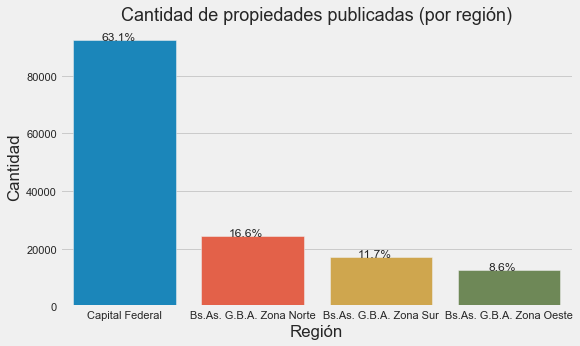

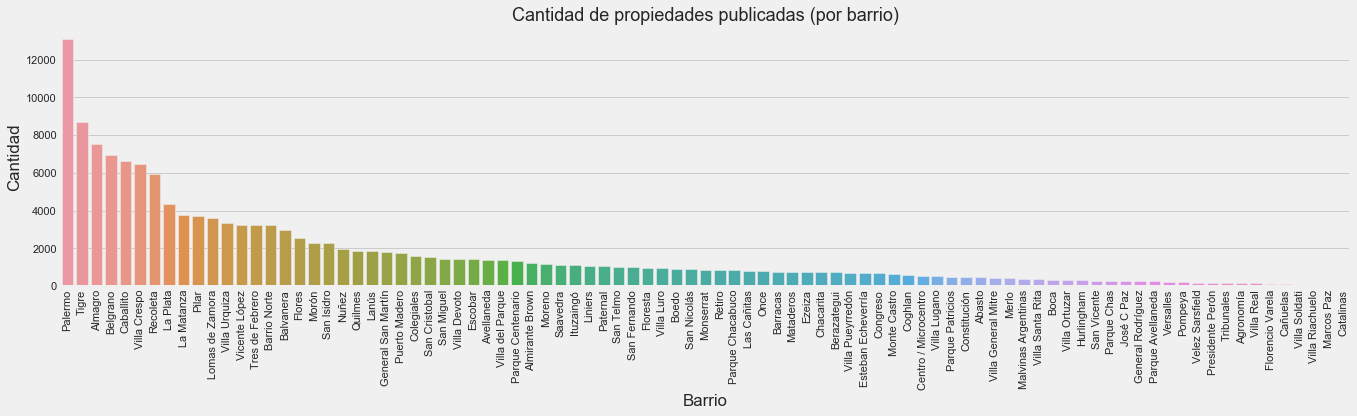

In [16]:
plt.figure(figsize = (6*3,4.8))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'l2', order = df['l2'].value_counts().index)
plt.title('Cantidad de propiedades publicadas (por región)', fontsize = 18)

plt.xlabel('Región')
plt.ylabel('Cantidad')
without_hue (ax, df.l2)
plt.show()

plt.figure(figsize = (12.4*3,6))
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'l3', order = df['l3'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Cantidad de propiedades publicadas (por barrio)', fontsize = 18)

plt.ylabel('Cantidad')
plt.xlabel('Barrio')
plt.tight_layout()

plt.show()

Vamos a realizar un análisis de frecuencia, que considere tanto el tipo de propiedad, como la región


Text(0, 0.5, 'Cantidad')

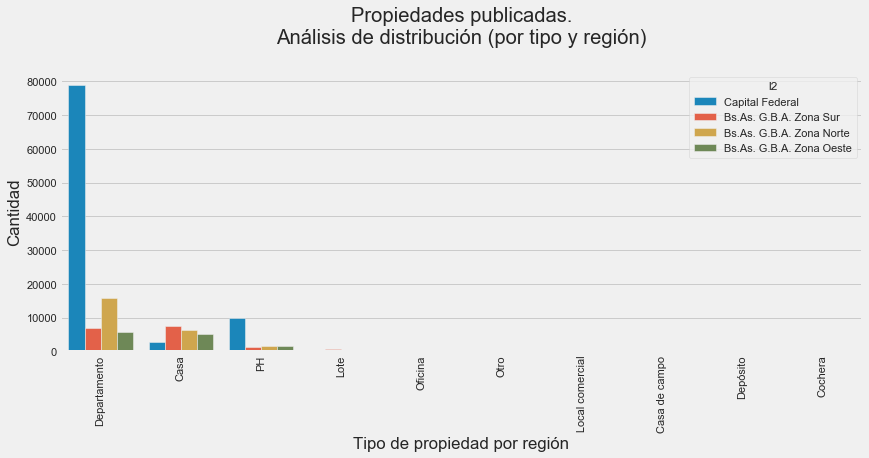

In [17]:
plt.figure(figsize = (6.4*2, 4.8)); sns.countplot(data = df, x = 'property_type', hue = 'l2', order = df['property_type'].value_counts().index)
plt.title('Propiedades publicadas.\nAnálisis de distribución (por tipo y región)\n')
plt.xticks(rotation = 90)
plt.xlabel("Tipo de propiedad por región")
plt.ylabel("Cantidad")
#plt.savefig('Cantidad de propiedades (por tipo).png', dpi = 400)

Vuelvo a graficar lo anterior, pero esta vez, vamos a mirar (en Q y en %), como se distribuye el tipo de propiedad, quitando los tipos de propiedades de frecuencia marginal

In [18]:
maskadtyr = df[(df['property_type'] == "Departamento") | (df['property_type'] == "Casa") | (df['property_type'] == "PH")]

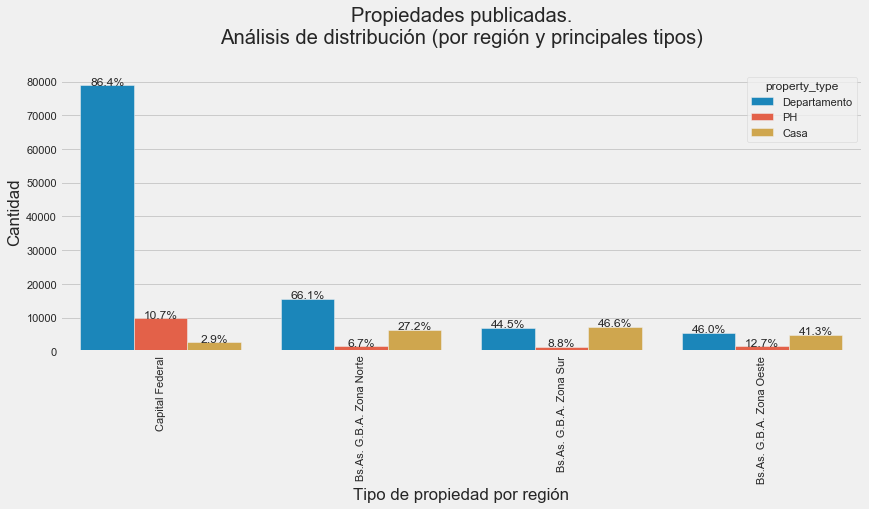

In [19]:
plt.figure(figsize = (6.4*2, 4.8)); ax = sns.countplot(data = maskadtyr, x = 'l2', hue = 'property_type', order = maskadtyr['l2'].value_counts().index)
plt.title('Propiedades publicadas.\nAnálisis de distribución (por región y principales tipos)\n')
plt.xticks(rotation = 90)
plt.xlabel("Tipo de propiedad por región")
plt.ylabel("Cantidad")

with_hue(ax,maskadtyr.l2,4,3)

Todo análisis que realizemos queda circunscripto a la base de publicaciones en Properati. Dicho esto, es llamativa la similitud de composición de oferta entre GBA Zona Oeste y Sur, y la exigua oferta de casas en Capital Federal.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [20]:
df2 = df[(df['l2'] == "Capital Federal") & ((df['property_type'] == "Departamento")\
| (df['property_type'] == "Casa") | (df['property_type'] == "PH"))]

df2.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

## Análisis de variables
Pretendo conocer mejor las variables. Comienzo por las fechas de publicación.
¿Hay propiedades cuya publicación fue dada de alta y baja el mismo día? Al final, usaré un filtro para quitar instancias con esta peculiaridad. Asumo que se trata de un error

In [21]:
df2.loc[df2['start_date'] == df2['end_date']].count() #son 1040 que deberé depurar

start_date         1040
end_date           1040
created_on         1040
lat                 971
lon                 971
l1                 1040
l2                 1040
l3                 1040
rooms              1040
bedrooms           1040
bathrooms           994
surface_total       648
surface_covered     646
price              1040
currency           1040
title              1040
description        1040
property_type      1040
operation_type     1040
dtype: int64

In [22]:
#Vamos a sacar esas instancias
df2 = df2[(df2['start_date'] != df2['end_date'])] 

Ahora, vamos a quedarnos con las variables propuestas

In [23]:
df3 = df2.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2','l3','currency', 'title', 'description','operation_type'], axis=1)

Hacemos un nuevo describe

In [24]:
df3.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,90445.000000,90445.000000,88320.000000,81920.000000,81604.000000,9.044500e+04
mean,2.964586,1.960418,1.559817,112.810510,95.112642,2.597681e+05
std,1.315872,1.072492,0.860666,984.562785,781.576737,3.230204e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.206000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Se observa que hay al menos una propiedad de 126k mts, y otra (quizás la misma) de 32MM U$S que nos está haciendo ruido en los estadísticos. Empecemos por analizar superficie.

<Figure size 432x432 with 0 Axes>

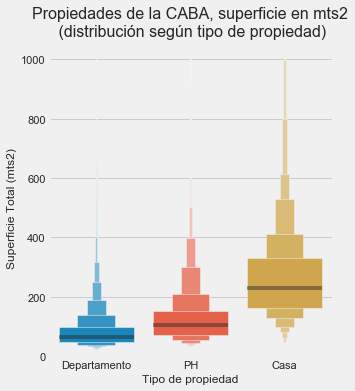

In [25]:
plt.figure(figsize = (6, 6))
sns.catplot(x='property_type', y="surface_total", kind="boxen", data=df3, showfliers = False); plt.ylim (0,1000)
plt.title ('Propiedades de la CABA, superficie en mts2\n (distribución según tipo de propiedad)\n', fontsize = 16)
plt.ylabel("Superficie Total (mts2)", fontsize = 12);plt.xlabel("Tipo de propiedad", fontsize = 12)
plt.show()

Vamos a repetir análisis con boxplot, pero esta vez quitando los outliers

<Figure size 345.6x345.6 with 0 Axes>

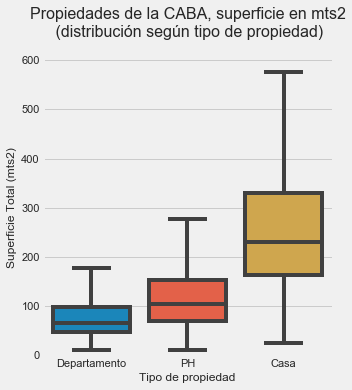

In [26]:
plt.figure(figsize = (4.8,4.8))
sns.catplot(x='property_type', y="surface_total", kind="box", data=df3, showfliers = False); plt.ylim (0,600)
plt.title ('Propiedades de la CABA, superficie en mts2\n (distribución según tipo de propiedad)\n', fontsize = 16)
plt.ylabel("Superficie Total (mts2)", fontsize = 12); plt.xlabel("Tipo de propiedad", fontsize = 12)
plt.show()

Luego de varias aproximaciones, observamos que 600 mts2 es una cota superior adecuada para simplificar la visualización de la distribución. Hacemos una máscara para continuar análisis sin esos valores, y adicionamos una cota inferior en 15 mts2. Finalizamos con un nuevo describe.

In [27]:
mask = df3 [(df3['surface_total']>= 15) & (df3['surface_total']<= 600)]
mask.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81600.000000,81600.000000,80723.00000,81600.000000,81090.000000,8.160000e+04
mean,2.999792,1.994902,1.54988,94.265674,84.277852,2.632842e+05
std,1.290399,1.037525,0.84358,72.951566,155.163640,3.245073e+05
min,1.000000,0.000000,1.00000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.00000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.00000,71.000000,63.000000,1.790000e+05
75%,4.000000,3.000000,2.00000,110.000000,96.000000,2.800000e+05
max,21.000000,15.000000,14.00000,600.000000,17220.000000,3.243423e+07


Este nuevo análisis me muestra un error entre superficie cubierta y total. La primera no puede ser > a la segunda. Miremos en detalle:

In [28]:
mask.loc[mask['surface_total']<mask['surface_covered']]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
446,5.0,4.0,3.0,230.0,244.0,490000.0,Casa
859,3.0,2.0,1.0,43.0,44.0,133000.0,Departamento
924,3.0,2.0,1.0,65.0,66.0,187000.0,Departamento
1329,2.0,1.0,2.0,44.0,45.0,235000.0,Departamento
1438,3.0,2.0,1.0,78.0,79.0,235000.0,Departamento
...,...,...,...,...,...,...,...
145138,1.0,1.0,1.0,24.0,25.0,54900.0,Departamento
145146,1.0,1.0,1.0,21.0,22.0,48000.0,Departamento
145262,3.0,2.0,1.0,51.0,52.0,127000.0,Departamento
145376,6.0,4.0,2.0,197.0,290.0,329900.0,Casa


Son 744 instancias con este error. Miremos otro error de lógica: no puede haber más dormitorios que ambientes:

In [29]:
mask.loc[mask['rooms']<mask['bedrooms']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01
mean,2.250000,4.100000,1.850000,126.250000,105.533333,2.334188e+05
std,1.409712,2.704046,0.971195,99.396932,72.574793,1.528601e+05
min,1.000000,2.000000,1.000000,38.000000,35.000000,7.300000e+04
25%,1.000000,2.000000,1.000000,57.750000,52.000000,1.485000e+05
50%,2.000000,3.000000,2.000000,94.000000,81.500000,1.885000e+05
75%,3.250000,5.000000,2.000000,140.000000,140.000000,2.900000e+05
max,5.000000,15.000000,5.000000,518.000000,400.000000,1.100000e+06


Encontramos otras 60 instancias con error (posiblemente, algunas contengan ambos errores). Depuremos el dataframe, quitando esta clase de inconsistencias.

In [30]:
df4 = df3[(df3['surface_total']>= 15) & (df3['surface_total']<= 600) & (df3['surface_total']>=df3['surface_covered']) & (df3['rooms']>=df3['bedrooms']) & (df3['rooms']>=df3['bathrooms'])]
df4

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH


Miremos la distribución de ambientes, dormitorios y baños, según tipo de propiedad

Text(0, 0.5, 'Cantidad de propiedades')

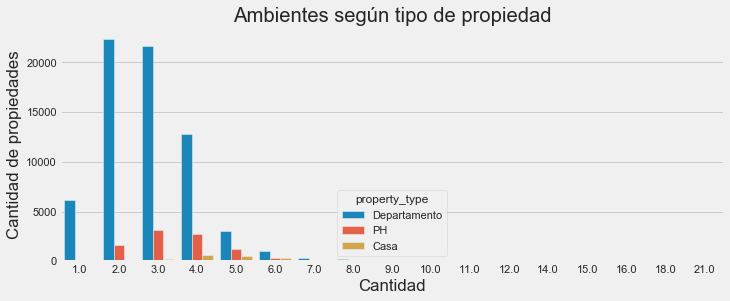

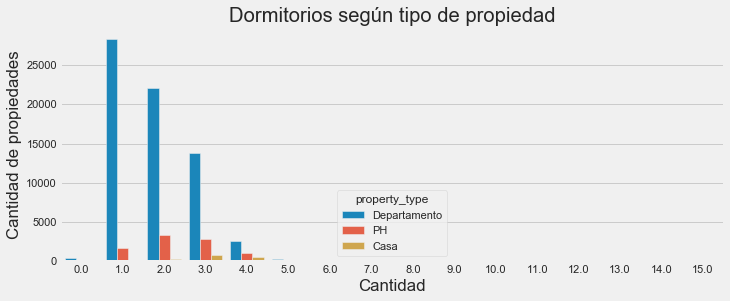

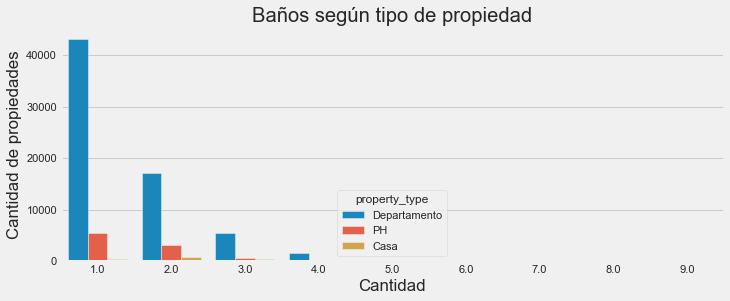

In [31]:
plt.figure(figsize = (12*3,4))

plt.subplot(1,3,1)
sns.countplot(data = df4, x = 'rooms', hue = 'property_type')
plt.title('Ambientes según tipo de propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Cantidad de propiedades')

plt.figure(figsize = (12*3,4))
plt.subplot(1,3,2)
sns.countplot(data = df4, x = 'bedrooms', hue = 'property_type')
plt.title('Dormitorios según tipo de propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Cantidad de propiedades')

plt.figure(figsize = (12*3,4))
plt.subplot(1,3,3)
sns.countplot(data = df4, x = 'bathrooms', hue = 'property_type')
plt.title('Baños según tipo de propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Cantidad de propiedades')

De cara al pairplot, parece útil acotar los límites en las tres variables. Esto lo haré luego de analizar la variable 'precio'. 

In [32]:
df4.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,78926.000000,78926.000000,78926.000000,78926.000000,78926.000000,7.892600e+04
mean,2.996326,1.988318,1.528444,93.479449,80.685478,2.569383e+05
std,1.278753,1.024905,0.793174,71.408619,57.866689,2.829764e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,70.000000,63.000000,1.790000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.800000e+05
max,21.000000,15.000000,9.000000,600.000000,600.000000,6.000000e+06


Ahora sí, analizemos precio mediante boxenplot y boxplot, sin outliers. Necesitamos una referencia para luego saber en qué valor establecer filtro.

<Figure size 864x432 with 0 Axes>

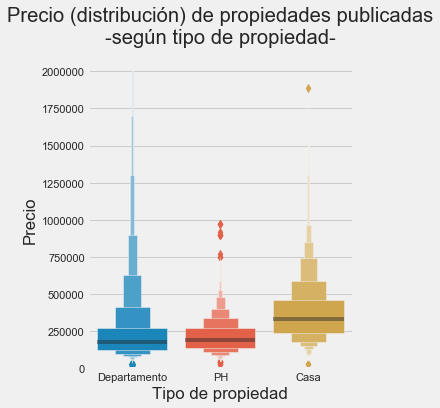

<Figure size 864x432 with 0 Axes>

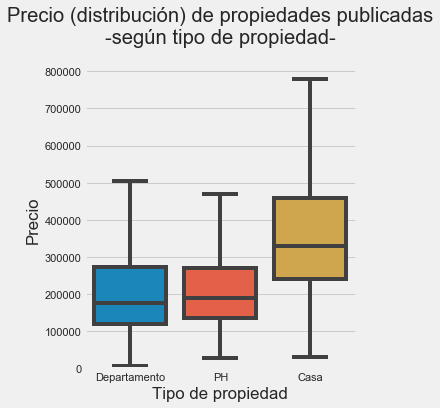

In [33]:
plt.figure(figsize = (6*2,6))
#plt.subplot(1,2,1)
sns.catplot(x='property_type', y='price', kind="boxen", data=df4)
plt.ylim (0,2000000)
plt.title ('Precio (distribución) de propiedades publicadas\n-según tipo de propiedad-\n')
plt.ylabel("Precio")
plt.xlabel("Tipo de propiedad")
plt.show()

plt.figure(figsize = (6*2,6))
#plt.subplot(1,2,2)
sns.catplot(x='property_type', y='price', kind="box", data=df4, showfliers = False)
plt.ylim (0,800000)
plt.title ('Precio (distribución) de propiedades publicadas\n-según tipo de propiedad-\n')
plt.ylabel("Precio")
plt.xlabel("Tipo de propiedad")
plt.show()

Vamos a establecer cota superior en 800K.

In [34]:
df5 = df4 [(df4['price']<= 800000)]
df5.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,76213.000000,76213.000000,76213.000000,76213.000000,76213.000000,76213.000000
mean,2.926902,1.943356,1.469749,87.148912,74.865089,216191.746487
std,1.210086,0.999675,0.720102,61.086003,46.904370,136687.000753
min,1.000000,0.000000,1.000000,15.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000,123000.000000
50%,3.000000,2.000000,1.000000,70.000000,61.000000,175000.000000
75%,4.000000,3.000000,2.000000,103.000000,90.000000,265000.000000
max,21.000000,15.000000,9.000000,600.000000,552.000000,800000.000000


Miremos más detenidamente a la variable dependiente 'price'¿Como es su función de densidad? Parece una chi2, se ve claramente el sesgo hacia la derecha. Recordemos que esto tiene filtros.

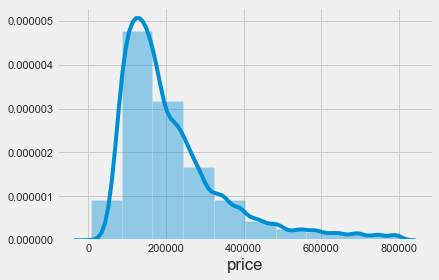

In [35]:
sns.distplot(df5['price'], bins = 10)

**Observando anteriormente la variable precio, vemos que esta no tiene la misma distribución para cada tipo de propiedad**. Más adelante buscaremos indicios en las correlaciones, de que podamos construir modelos diferentes, según tipo de propiedad.

**Ahora si, miremos distribuciones y relaciones de a pares mediente pairplot**.
Antes, hago máscara para ambientes, dormitorios y baños, que nos ayuden a una mejor visualización.

In [36]:
mask5 = df5[(df5['rooms']<= 8) & (df5['bedrooms']<= 6) & (df5['bathrooms']<=5)]

Text(0.5, 1, 'Pairplot: relación entre variables del modelo')

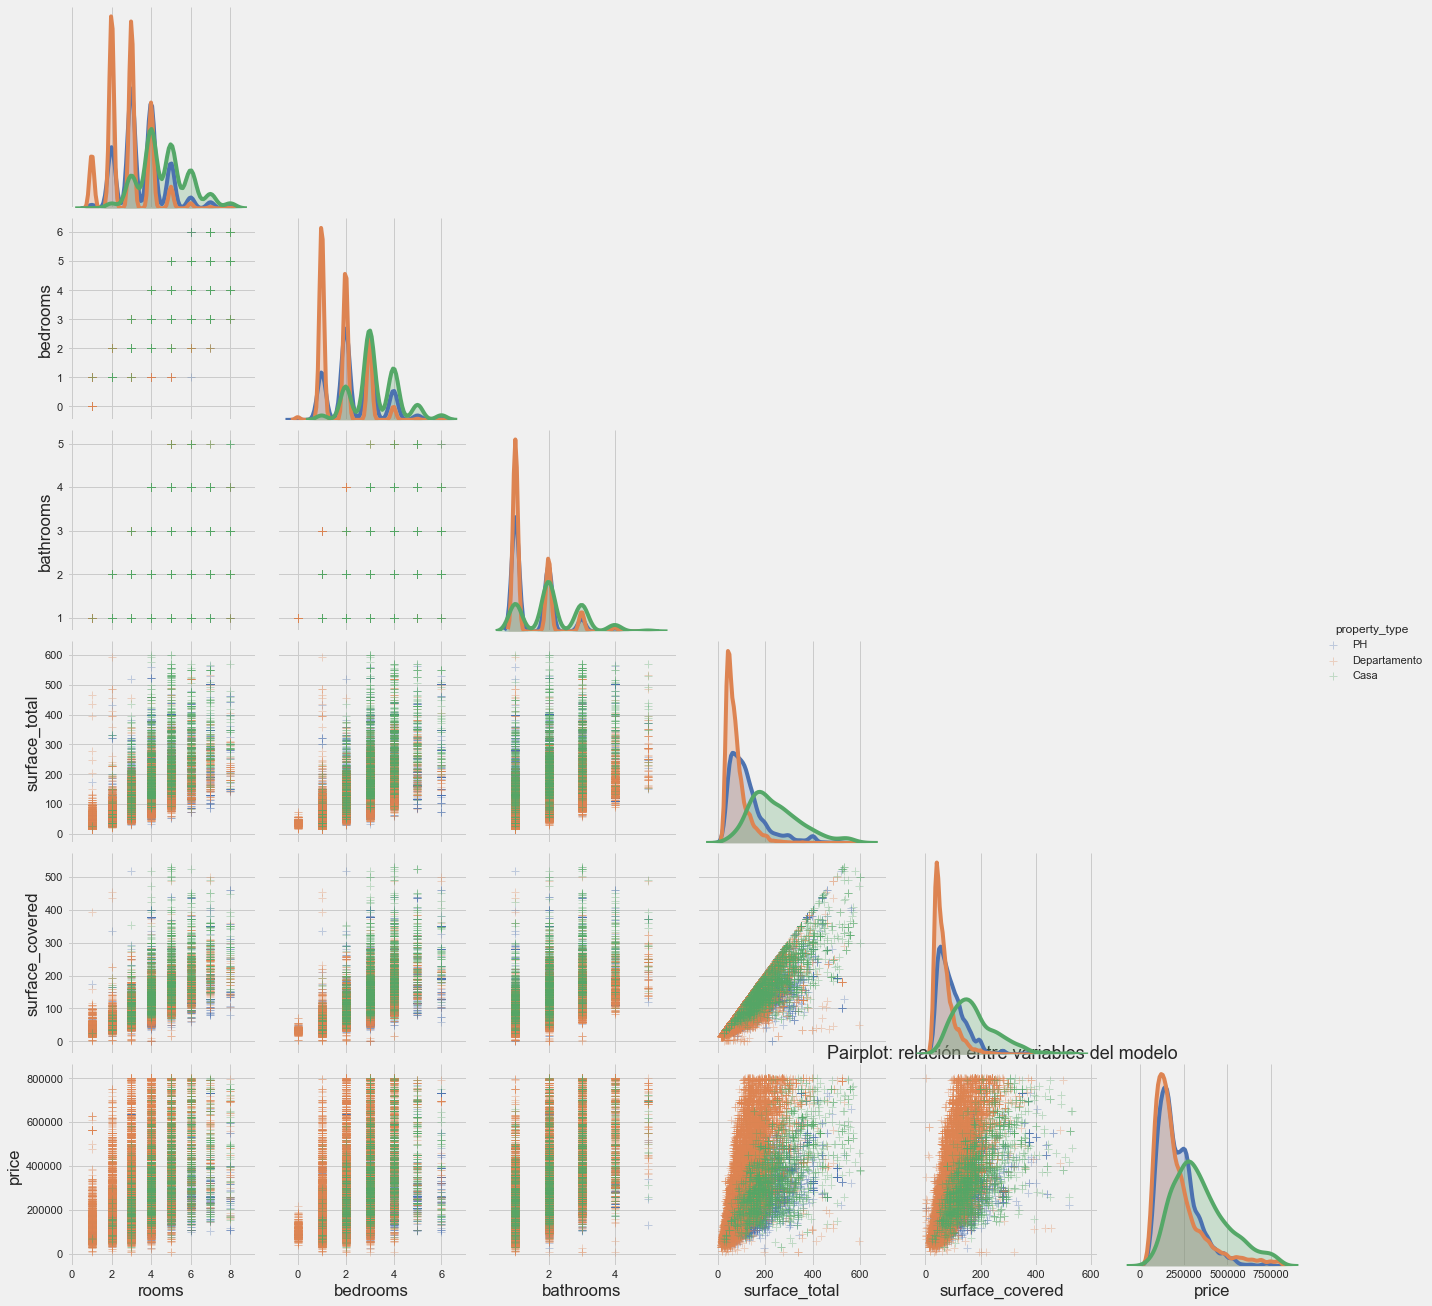

In [37]:
sns.pairplot(mask5, hue = 'property_type', palette = 'deep', markers= '+', height = 3, corner=True, plot_kws=dict(s=80, edgecolor="white", linewidth=1, alpha=0.3))
plt.title('Pairplot: relación entre variables del modelo', fontsize = 18)

Gráficamente, 'price' parece correlacionada, a primera vista, con todas las variables independientes. En el paso siguiente entraremos en este tipo de análisis.

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [38]:
corr = df5.corr()
print ('Matriz de correlación')
corr

Matriz de correlación


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.935661,0.589083,0.727884,0.779824,0.582839
bedrooms,0.935661,1.000000,0.593846,0.709808,0.761748,0.560168
bathrooms,0.589083,0.593846,1.000000,0.598219,0.654831,0.667574
surface_total,0.727884,0.709808,0.598219,1.000000,0.917137,0.685025
surface_covered,0.779824,0.761748,0.654831,0.917137,1.000000,0.740069
price,0.582839,0.560168,0.667574,0.685025,0.740069,1.000000


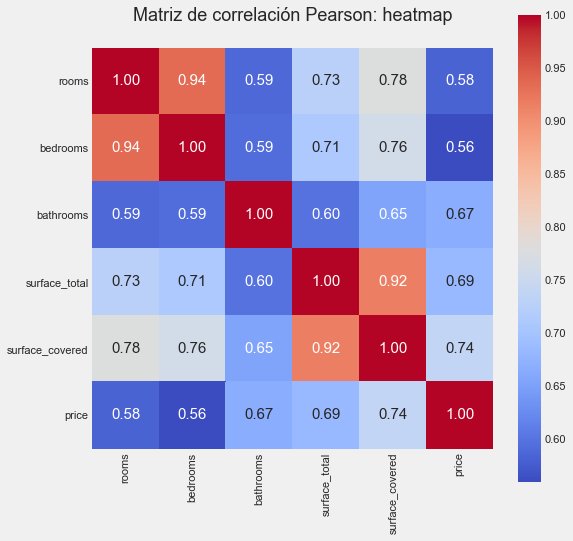

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
xticklabels= df5.drop(['property_type'], axis=1).columns,
yticklabels= df5.drop(['property_type'], axis=1).columns,
cmap= 'coolwarm')
plt.title('Matriz de correlación Pearson: heatmap\n', fontsize = 18)
plt.xticks(rotation = 90)
plt.savefig('Matriz de correlación: heatmap.png', dpi = 800)
plt.show()

**Vamos a hacer correlación por método spearman** para calcular sin outliers (los que hayan quedado a pesar de los distintos filtros).

In [40]:
corr2 = df5.corr(method= 'spearman'); print ('Matriz de correlación por método Spearman')
corr2

Matriz de correlación por método Spearman


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.966753,0.596614,0.835559,0.868720,0.677246
bedrooms,0.966753,1.000000,0.591581,0.814937,0.849458,0.656757
bathrooms,0.596614,0.591581,1.000000,0.653379,0.670755,0.662120
surface_total,0.835559,0.814937,0.653379,1.000000,0.956569,0.821585
surface_covered,0.868720,0.849458,0.670755,0.956569,1.000000,0.822615
price,0.677246,0.656757,0.662120,0.821585,0.822615,1.000000


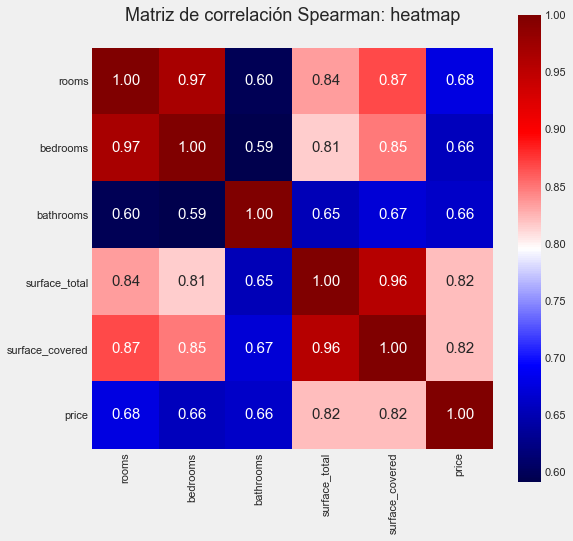

In [41]:
plt.figure(figsize=(8,8))
sns.heatmap(corr2, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
xticklabels= df5.drop(['property_type'], axis=1).columns,
yticklabels= df5.drop(['property_type'], axis=1).columns,
cmap= 'seismic')
plt.title('Matriz de correlación Spearman: heatmap\n', fontsize = 18)
plt.xticks(rotation = 90)
#plt.savefig('Matriz de correlación: heatmap.png', dpi = 800)
plt.show()

Hagamos correlación por el método Spearman, pero para cada tipo de propiedad.

In [42]:
df5_Dep = df5[(df5['property_type']== 'Departamento')]
df5_PH = df5[(df5['property_type']== 'PH')]
df5_Casa = df5[(df5['property_type']== 'Casa')]

In [43]:
corr_df5_Dep = df5_Dep.corr(method= 'spearman');
corr_df5_PH = df5_PH.corr(method= 'spearman')
corr_df5_Casa = df5_Casa.corr(method= 'spearman')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

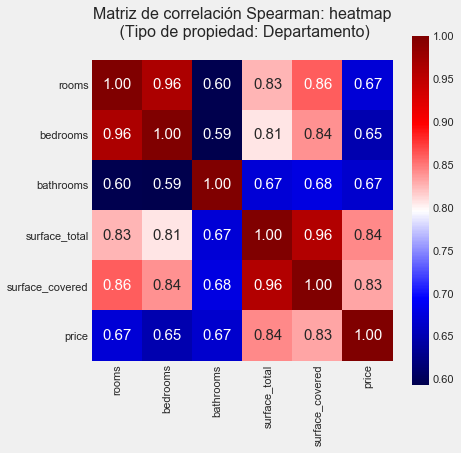

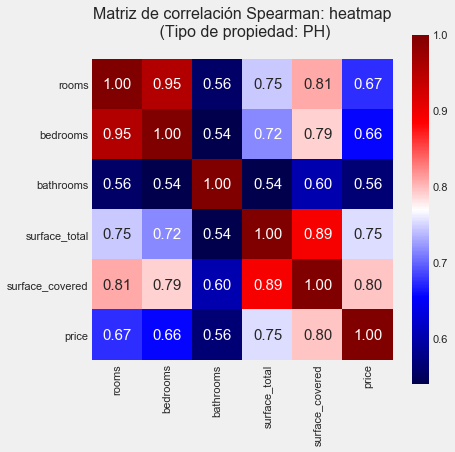

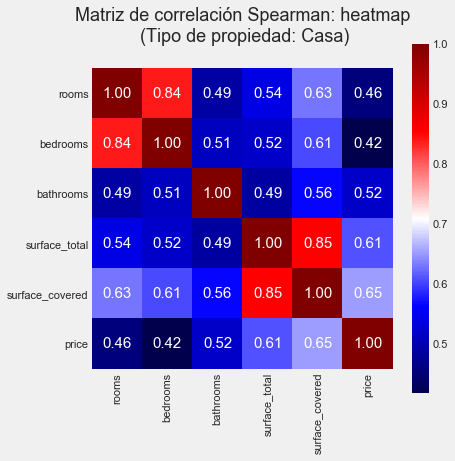

In [44]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_df5_Dep, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
xticklabels= df5_Dep.drop(['property_type'], axis=1).columns,
yticklabels= df5_Dep.drop(['property_type'], axis=1).columns,
cmap= 'seismic')
plt.title('Matriz de correlación Spearman: heatmap\n (Tipo de propiedad: Departamento)\n', fontsize = 16)
plt.xticks(rotation = 90)

plt.figure(figsize=(6,6))
sns.heatmap(corr_df5_PH, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
xticklabels= df5_PH.drop(['property_type'], axis=1).columns,
yticklabels= df5_PH.drop(['property_type'], axis=1).columns,
cmap= 'seismic')
plt.title('Matriz de correlación Spearman: heatmap\n (Tipo de propiedad: PH)\n', fontsize = 16)
plt.xticks(rotation = 90)

plt.figure(figsize=(6,6))
sns.heatmap(corr_df5_Casa, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
xticklabels= df5_Casa.drop(['property_type'], axis=1).columns,
yticklabels= df5_Casa.drop(['property_type'], axis=1).columns,
cmap= 'seismic')
plt.title('Matriz de correlación Spearman: heatmap\n (Tipo de propiedad: Casa)\n', fontsize = 18)
plt.xticks(rotation = 90)

El análisis comparado de las correlaciones según tipo de propiedad nos indica que, *conforme nos movemos de departamento a ph, y de ph a casa, todas las variables independientes pierden poder explicativo del precio*. A su vez, habíamos visto que las distribuciones de precio eran similares entre Departamento y PH, y diferentes estas dos respecto de propiedades tipo Casa. **Voy a considerar construir modelos diferentes, en función del tipo de propiedad.**  

### 2.1 Desafío

Podemos intentar responder lo siguiente: ¿en que rango de precios se encuentra el mt2 en CABA?, ¿que zonas son más caras, y cuales más baratas? De encontrar un patrón, ¿a qué responderá? 
El valor por mt2 nos permite neutralizar los efectos que en el precio puedan tener las diferentes dimensiones de las propiedades. 

Vamos a geolocalizar propiedades, y daremos escala de color según valor por mt2 (variable que construiremos). Dada la amplitud de precio, lo ideal será analizar su distribución mediante boxplot, quitando outliers, para establecer cotas.

In [45]:
dfm2 = df[(df['l2'] == "Capital Federal") & ((df['property_type'] == "Departamento")\
| (df['property_type'] == "Casa") | (df['property_type'] == "PH"))]

In [46]:
dfm2 ['valor_m2_miles'] = (df.price/df.surface_covered)/1000

C:\Users\BagattinMarciano\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
dfmaping = dfm2.drop(['start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 'description',
       'operation_type'], axis=1)

<Figure size 432x432 with 0 Axes>

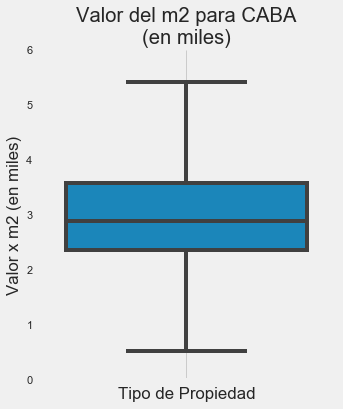

In [48]:
plt.figure(figsize = (6,6))

sns.catplot(y='valor_m2_miles', kind="box", data=dfmaping, showfliers = False)
plt.ylim (0,6)
plt.title('Valor del m2 para CABA\n(en miles)')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Valor x m2 (en miles)')
plt.grid()
#plt.savefig('.png', dpi = 300)
plt.show()

In [49]:
dfmaping.valor_m2_miles.describe()

count    82250.000000
mean         3.263425
std          8.032634
min          0.001706
25%          2.347222
50%          2.875000
75%          3.575000
max        980.000000
Name: valor_m2_miles, dtype: float64

Bigote inferior = Q1 - 1.5 x IQR (Q3-Q1) = 0.505555\
Bigote superior = Q3 + 1.5 x IQR (Q3-Q1) = 5.416667

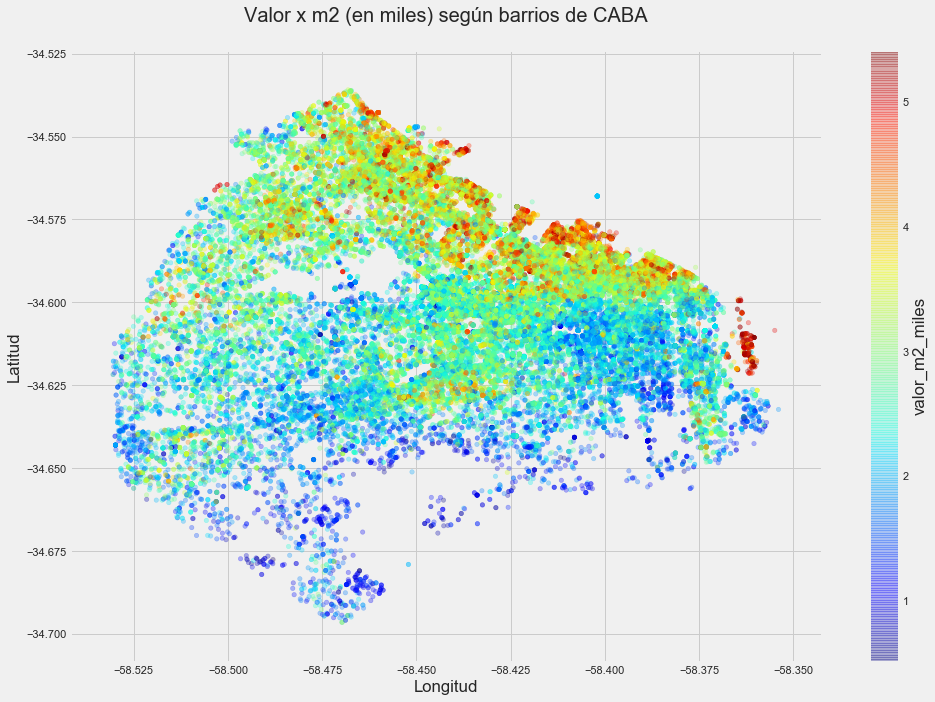

In [50]:
maskmaping = dfmaping[(dfmaping['valor_m2_miles']>=0.505555) & (dfmaping['valor_m2_miles']<=5.416667)]

maskmaping.plot(kind='scatter', x='lon', y='lat', c='valor_m2_miles', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.30, figsize=(15,10.5))
plt.title('Valor x m2 (en miles) según barrios de CABA\n', fontsize=20)
plt.ylabel('Latitud')
plt.xlabel('Longitud')
plt.show()

**El precio por metro cuadrado muestra sus extremos entre Puerto Madero/zona norte (más caro), y al sur de la Au. 25 de Mayo/Au. Dellepiane (más barato).** Este patrón es bastante claro. Es importante aclarar que, si bien parece ser un mapeo de resultados lógicos, despojado de la posibilidad de una paradoja de Simpson, este se basa solo en propiedades publicadas en Properati. Probablemente, un análisis de geolocalización de alguna otra variable que denote nivel de ingresos/habitante, podría ayudar a confirmar el patrón hallado más arriba.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

**Vamos a realizar el depurado**

In [51]:
dp = df[(df['l2'] == "Capital Federal") & ((df['property_type'] == "Departamento")\
| (df['property_type'] == "Casa") | (df['property_type'] == "PH"))]

In [52]:
dp1 = dp [(dp['surface_total']>= 15) & (dp['surface_total']<= 1000) & (dp['price']<=4000000)]

In [53]:
dp2 = dp1.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2','l3', 'currency', 'title', 'description',
       'operation_type', 'property_type'], axis=1)

In [54]:
dp3 = dp2.dropna(); dp3.shape

(81019, 6)

Una vez alcanzado el valor esperado en el checkpoint, vamos a separar variables independientes de la  variable target

In [55]:
X = dp3.drop (['price'], axis=1)
y = dp3 ['price']
X.shape

(81019, 5)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Usaremos código para desarrollar una función para la curva de validación. La métrica utilizada para validar regresión será RMSE**

In [57]:
def plot_validation_curve(train_test_split_object, k_values, model_type='KNeighborsRegressor'):
   
    X1, X2, y1, y2 = train_test_split_object
    # Definimos las listas vacias para los valores de accuracy deseados
    lista_rmse_train = []
    lista_rmse_test = []

    # Generamos un loop sobre los distintos valores de k 
    for k in k_values:

        # Vamos a repetir el siguiente bloque de código

        # Definir el modelo con el valor de vecinos deseado
        if (model_type=='tree'):
            clf = DecisionTreeRegressor(max_depth=k, random_state=42)
        else:
            clf = KNeighborsRegressor(n_neighbors= k)
        # Entrenar el modelo
        clf.fit(X1, y1)

        # Predecir y evaluar sobre el set de entrenamiento
        y1_pred = clf.predict(X1)
        rmse_train = np.sqrt(mean_squared_error(y1, y1_pred)) 

        # Predecir y evaluar sobre el set de evaluación
        y2_pred = clf.predict(X2)
        rmse_test = np.sqrt(mean_squared_error(y2, y2_pred))

        # Agregar la información a las listas
        lista_rmse_train.append(rmse_train)
        lista_rmse_test.append(rmse_test)
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(k_values, lista_rmse_train,'o-',label='train' )
    plt.plot(k_values, lista_rmse_test,'o-',label='test')
    plt.legend()
    plt.xlabel('K Values')
    plt.ylabel('RMSE')
    plt.savefig('Curva de validación.png', dpi = 400)

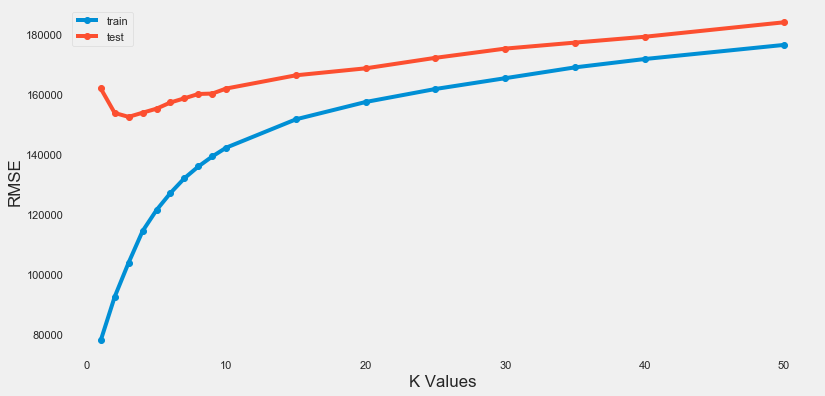

In [58]:
plot_validation_curve(train_test_split(X, y, random_state=42, test_size = 0.3),k_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50])

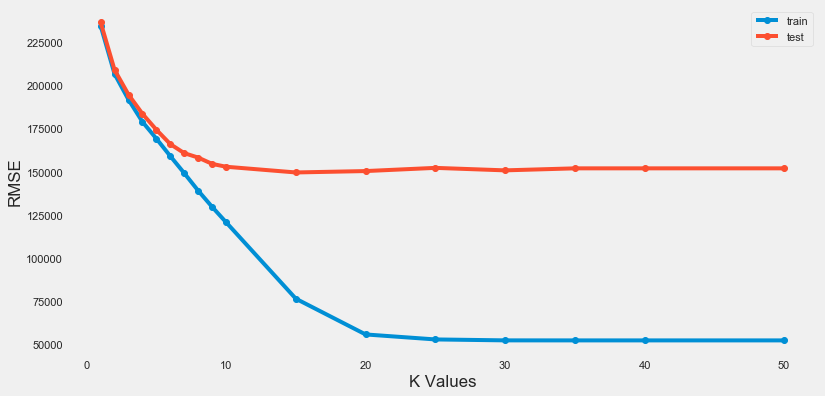

In [59]:
plot_validation_curve(train_test_split(X, y, random_state=42, test_size = 0.3),k_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50], model_type='tree')

Los hiperparámetros que parecen arrojar mejores resultados, son 3 vecinos para KNN, y 20 nodos para Tree. Voy a realizar el split, instanciar los modelos, y entrenarlos. En el caso de KNN, la ponderación de la distancia mejora sustancialmente la capacidad del modelo.

In [60]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=42, train_size=0.7)
print(X1.shape, X2.shape, y1.shape, y2.shape)

(56713, 5) (24306, 5) (56713,) (24306,)


In [61]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3, weights = 'distance', p = 1)

In [62]:
linear_model.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
tree_regressor.fit(X1, y1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [64]:
knn_regressor.fit(X1, y1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='distance')

Una vez elegido el split de la muestra y los valores de los hiperparámetros, vamos a mirar el RMSE, la distribución de los errores, y el R2, entre train y test, y entre el benchmark y los otros dos métodos.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567
Coeficiente de Determinación en Train: 0.5517887107017188
Coeficiente de Determinación en Test: 0.5514864358797206



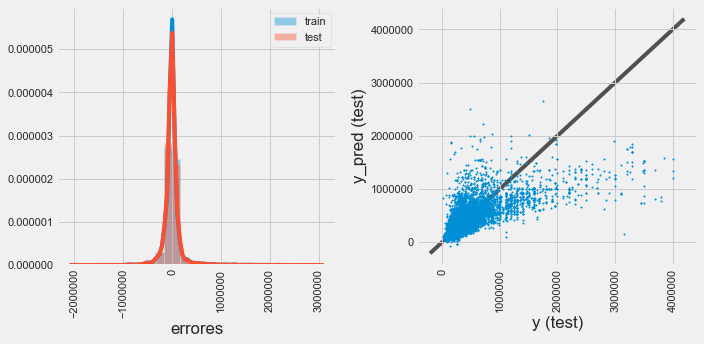

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 55906.294198892916
Raíz del error cuadrático medio en Test: 150455.20183513418
Coeficiente de Determinación en Train: 0.964686591209566
Coeficiente de Determinación en Test: 0.7522822324922105



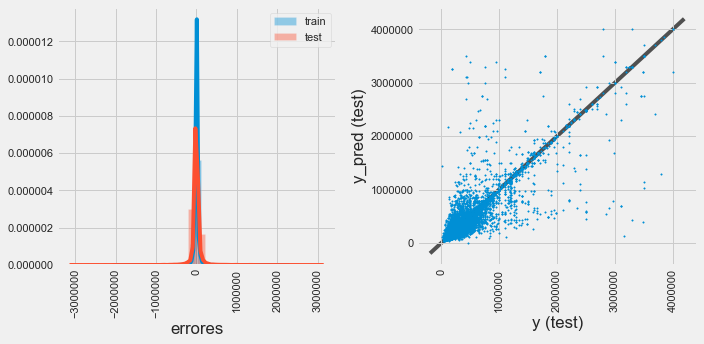

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 58416.74848166733
Raíz del error cuadrático medio en Test: 143754.00870550904
Coeficiente de Determinación en Train: 0.961443909497735
Coeficiente de Determinación en Test: 0.7738572492329787



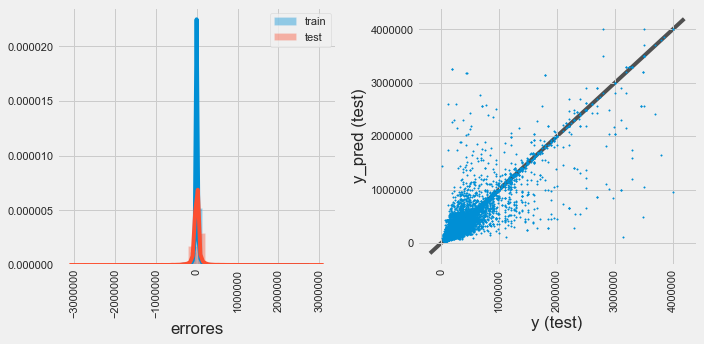

In [65]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y1_pred = model.predict(X1)
    y2_pred = model.predict(X2)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y1, y1_pred))
    rmse_test = np.sqrt(mean_squared_error(y2, y2_pred))
    R2_train = r2_score(y1, y1_pred)
    R2_test = r2_score(y2, y2_pred)
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'Coeficiente de Determinación en Train: {R2_train}')
    print(f'Coeficiente de Determinación en Test: {R2_test}\n')
    
    plt.figure(figsize = (10,5))

    plt.subplot(1,2,1)
    sns.distplot(y1 - y1_pred, bins = 30, label = 'train')
    sns.distplot(y2 - y2_pred, bins = 30, label = 'test')
    plt.xticks(rotation = 90)
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y2,y2_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xticks(rotation = 90)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.savefig('Analisis de regresión: Métricas RMSE y R2, benchmark frente a Arbol de decisión y KNN.png', dpi = 400)
    plt.show()

# RESPUESTA A LA CONSIGNA 3 ML
El objetivo es obtener un modelo de ML de regresión, ya que la etiqueta de salida (variable independiente) es numérica contínua (precio). Realizamos el benchmark (regresión lineal), y otros dos modelos de regresión, mediente método de árbol de decisión y de KNN. Usamos un split de la base para no testear el modelo con los mismos datos con que lo entrenamos, y evitar así un overfiting. Elegí dividir en 70/30, ya que este parámetro es el que me arrojó mejores valores globales de error. 

Estamos observando la métrica de evaluación (RMSE), la distribución de los errores de predicción, el scatter entre precio real y predicho, y el coeficiente de eterminación (R2), todos ellos en función a los valores que hemos considerado más apropiados para los parámetros.

**Modelo elegido: KNN.** 
En general, el RMSE no es óptimo, fundamentalmente cuando lo comparamos para la base de testeo respecto de la de entrenamiento, aspecto que no logré mejorar conjuntamente modificando el balance en el split. Se observa heterocedasticidad a valores de 'price' crecientes. Evidentemente, quedaron en el término de error, ciertas variables que céteris paribus nos expliquen estos casos. Estas variables, muy probablemente, sean el tipo de propiedad, y el barrio ('l3'). Ya habíamos observado que, ciertamente, las distribuciones de precio eran diferentes para la primera variable que mencionamos. Sobre la segunda, haré un comentario al final. A pesar de esto, el KNN es el modelo que globalmente presenta mejor error. En relación a la distribución de los errores, esta es normal, en torno a cero, por lo que el modelo parece adecuado. El modelo presenta muy alto R2, posiblemente sobre explicado por usar variables independientes con muy alta correlación.

# Propuesta
Generemos nuevamente los modelos. Pero, esta vez, usaremos un solo tipo de propiedad (departamento). ¿Motivo? El tipo de propiedad, ceteris paribus, parece capaz de explicar una parte de la variabilidad en el precio. Como aún no hemos aprendido a incorporar variables categóricas, opto por hacer un slice con este solo tipo de propiedad. La hipótesis es que esto mejoraría el RMSE. La prueba de hiperparámetro la haré manual. 

In [66]:
dp2_A = dp1.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2','l3', 'currency', 'title', 'description',
       'operation_type'], axis=1)

In [67]:
dp3_A = dp2_A.dropna()

In [68]:
dp3_A_depto = dp3_A [(dp3_A['property_type']=='Departamento')]

In [69]:
X_A_depto = dp3_A_depto.drop (['price', 'property_type'], axis=1)
y_A_depto = dp3_A_depto ['price']
X_A_depto.shape

(69313, 5)

In [70]:
X_A_depto1, X_A_depto2, y_A_depto1, y_A_depto2 = train_test_split(X_A_depto, y_A_depto, random_state=42, train_size=0.7)
print(X_A_depto1.shape, X_A_depto2.shape, y_A_depto1.shape, y_A_depto2.shape)

(48519, 5) (20794, 5) (48519,) (20794,)


In [71]:
linear_model_A = LinearRegression()
tree_regressor_A = DecisionTreeRegressor(max_depth=15, random_state=42)
knn_regressor_A = KNeighborsRegressor(n_neighbors=5, weights = 'distance', p = 1)

In [72]:
linear_model_A.fit(X_A_depto1,y_A_depto1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
tree_regressor_A.fit(X_A_depto1,y_A_depto1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [74]:
knn_regressor_A.fit(X_A_depto1,y_A_depto1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='distance')

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 174653.23610724005
Raíz del error cuadrático medio en Test: 179386.0549242991
Coeficiente de Determinación en Train: 0.688540635911286
Coeficiente de Determinación en Test: 0.6888430750228827



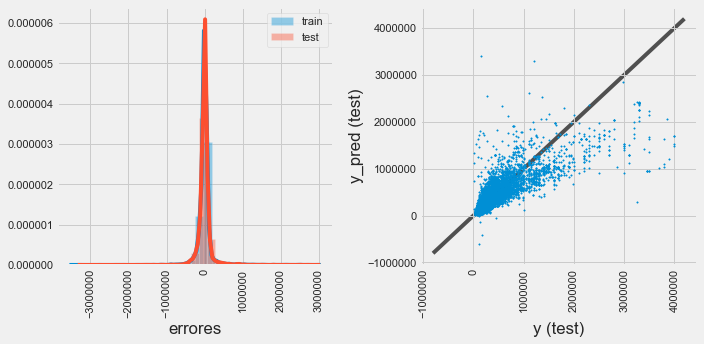

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 67608.48342670829
Raíz del error cuadrático medio en Test: 124176.54330553328
Coeficiente de Determinación en Train: 0.9533286345867736
Coeficiente de Determinación en Test: 0.8508987633390479



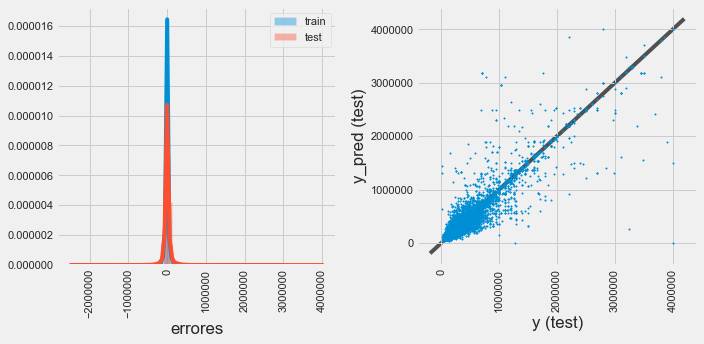

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 54015.17527076303
Raíz del error cuadrático medio en Test: 118129.44727131707
Coeficiente de Determinación en Train: 0.9702093692942819
Coeficiente de Determinación en Test: 0.8650669128183552



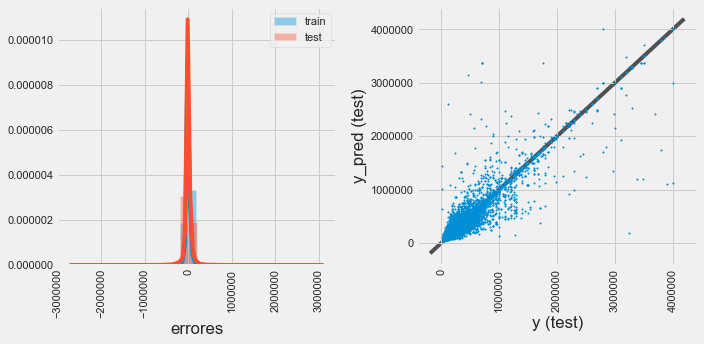

In [75]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model_A, tree_regressor_A, knn_regressor_A]):
    y_A_depto1_pred = model.predict(X_A_depto1)
    y_A_depto2_pred = model.predict(X_A_depto2)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_A_depto1, y_A_depto1_pred))
    rmse_test = np.sqrt(mean_squared_error(y_A_depto2, y_A_depto2_pred))
    R2_train = r2_score(y_A_depto1, y_A_depto1_pred)
    R2_test = r2_score(y_A_depto2, y_A_depto2_pred)
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'Coeficiente de Determinación en Train: {R2_train}')
    print(f'Coeficiente de Determinación en Test: {R2_test}\n')
    
    plt.figure(figsize = (10,5))

    plt.subplot(1,2,1)
    sns.distplot(y_A_depto1 - y_A_depto1_pred, bins = 30, label = 'train')
    sns.distplot(y_A_depto2 - y_A_depto2_pred, bins = 30, label = 'test')
    plt.xticks(rotation = 90)
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_A_depto2,y_A_depto2_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xticks(rotation = 90)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.savefig('Analisis de regresión: Métricas RMSE y R2, benchmark frente a Arbol de decisión y KNN.png', dpi = 400)
    plt.show()

**CONCLUSIÓN** Hay mejora en todos los modelos, sustancial en algunos casos. Esto significa que los modelos realizados en primera instancia sufren de variable relevante omitida. Queda pendiente probar con las otras propiedades, e incorporar, más adelante, la variable "barrio" ('l3'). 

# ¿Pendiente? Omisión de otra variable. El caso de 'l3'

**¿Tiene el barrio capacidad explicativa de la variabilidad en el precio?** Este análisis queda para cuando aprendamos a incorporar variables categóricas a los modelos de regresión. Por ahora, voy a graficar el rango de precio por barrio. 

Text(0.5, 1, 'Precio propiedad por barrio de Capital Federal, en PH, Casa y Departamento\n\n')

<Figure size 3110.4x432 with 0 Axes>

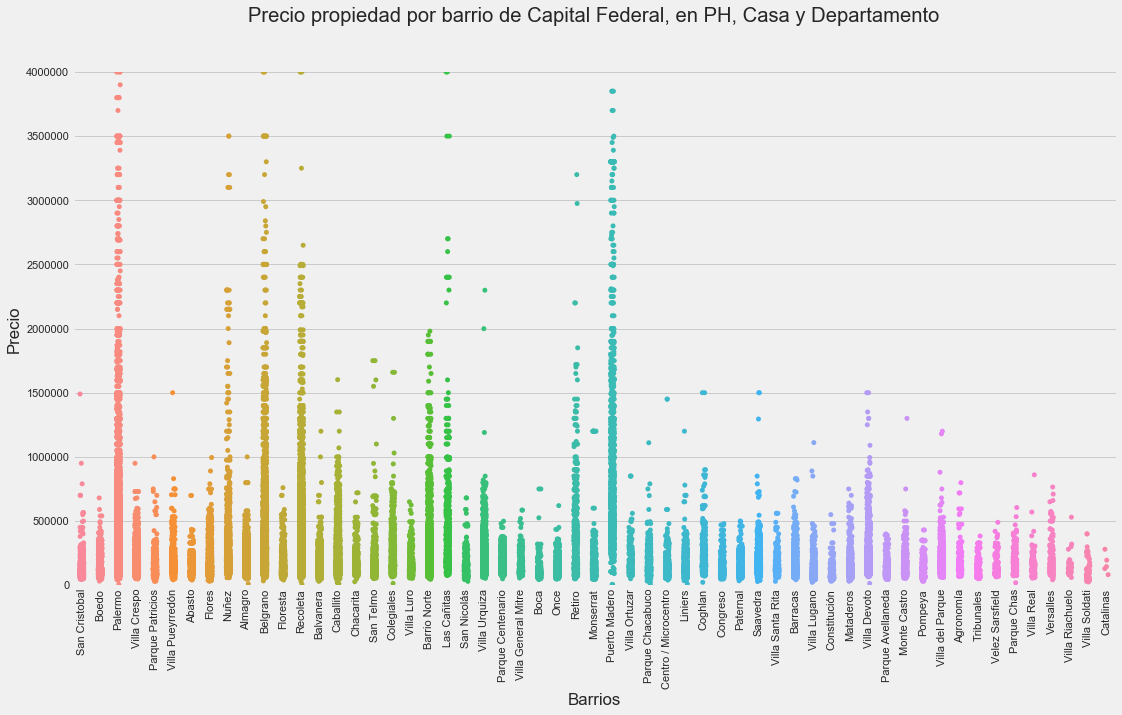

In [76]:
plt.figure(figsize = (14.4*3,6))
sns.catplot(data=dp1, x = 'l3', y = 'price', height=8, aspect=2)
plt.xticks(rotation=90)
plt.ylim(0,4000000)
plt.xlabel('Barrios')
plt.ylabel('Precio')
plt.title('Precio propiedad por barrio de Capital Federal, en PH, Casa y Departamento\n\n')

Se observa claramente que el barrio puede ser una variable de potente valor explicativo. Su incorporación podría mejorar el RMSE.